In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\omkar\Downloads\IMDB Dataset.csv\IMDB Dataset.csv")
df=pd.DataFrame(data)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
import re

In [4]:
def clean_dataset(text):
    #lower_case
    text=text.lower()
    
    #remove the html tag
    text=re.sub(r"<.*?>"," ",text)

    #remove numbers and puntuation:
    text=re.sub(r"[^a-zA-Z\s]"," ",text)

    #remove extra space
    text=re.sub(r"\s+"," ",text).strip()

    return text
df["clean_review"] = df["review"].apply(clean_dataset)    

In [5]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...


In [15]:
df["sentiment"].value_counts(normalize=True) * 100

sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64

In [15]:
# remove stop word
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stopwords(text):
    cleaned_token = []

    words = text.split() 

    for word in words:
        if word not in ENGLISH_STOP_WORDS:
            cleaned_token.append(word)

    return cleaned_token

df['stopword_removed'] = df['clean_review'].apply(remove_stopwords)


In [16]:
df

,review,sentiment,clean_review,stopword_removed
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[reviewers, mentioned, watching, just, oz, epi..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[basically, s, family, little, boy, jake, thin..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[petter, mattei, s, love, time, money, visuall..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, did, right, good, job, wasn, ..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...,"[m, going, disagree, previous, comment, maltin..."


In [9]:
!pip install NLTK

In [22]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")


In [23]:
def snowball_stem(tokens):
    stemmed_tokens = []

    for word in tokens:
        stemmed_tokens.append(stemmer.stem(word))

    return stemmed_tokens

In [24]:
df["stemmed_tokens"] = df["stopword_removed"].apply(snowball_stem)

In [25]:
df

,review,sentiment,clean_review,stopword_removed,stemmed_tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[reviewers, mentioned, watching, just, oz, epi...","[review, mention, watch, just, oz, episod, ll,..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[basically, s, family, little, boy, jake, thin...","[basic, s, famili, littl, boy, jake, think, s,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[petter, mattei, s, love, time, money, visuall...","[petter, mattei, s, love, time, money, visual,..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, did, right, good, job, wasn, ...","[thought, movi, did, right, good, job, wasn, t..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...,"[m, going, disagree, previous, comment, maltin...","[m, go, disagre, previous, comment, maltin, se..."


In [26]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5
)

In [30]:
df["stemmed_text"] = df["stemmed_tokens"].apply(lambda x: " ".join(x))

In [31]:
df

,review,sentiment,clean_review,stopword_removed,stemmed_tokens,stemmed_text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[reviewers, mentioned, watching, just, oz, epi...","[review, mention, watch, just, oz, episod, ll,...",review mention watch just oz episod ll hook ri...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...",wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[basically, s, family, little, boy, jake, thin...","[basic, s, famili, littl, boy, jake, think, s,...",basic s famili littl boy jake think s zombi cl...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[petter, mattei, s, love, time, money, visuall...","[petter, mattei, s, love, time, money, visual,...",petter mattei s love time money visual stun fi...
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, did, right, good, job, wasn, ...","[thought, movi, did, right, good, job, wasn, t...",thought movi did right good job wasn t creativ...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir...",bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ...",cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...,"[m, going, disagree, previous, comment, maltin...","[m, go, disagre, previous, comment, maltin, se...",m go disagre previous comment maltin second ra...


In [32]:
X = vectorizer.fit_transform(df["stemmed_text"])

In [33]:
df

,review,sentiment,clean_review,stopword_removed,stemmed_tokens,stemmed_text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[reviewers, mentioned, watching, just, oz, epi...","[review, mention, watch, just, oz, episod, ll,...",review mention watch just oz episod ll hook ri...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...",wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[basically, s, family, little, boy, jake, thin...","[basic, s, famili, littl, boy, jake, think, s,...",basic s famili littl boy jake think s zombi cl...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[petter, mattei, s, love, time, money, visuall...","[petter, mattei, s, love, time, money, visual,...",petter mattei s love time money visual stun fi...
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, did, right, good, job, wasn, ...","[thought, movi, did, right, good, job, wasn, t...",thought movi did right good job wasn t creativ...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir...",bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ...",cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...,"[m, going, disagree, previous, comment, maltin...","[m, go, disagre, previous, comment, maltin, se...",m go disagre previous comment maltin second ra...


In [34]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3926824 stored elements and shape (50000, 5000)>

In [35]:
y = df["sentiment"].map({
    "positive": 1,
    "negative": 0
})

In [38]:
#train_test_split
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [42]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8898


In [43]:
svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8802


In [50]:
report = classification_report(
    y_test,
    y_pred_svm,
    target_names=["negative", "positive"],
    output_dict=True
)
df_report = pd.DataFrame(report).transpose()

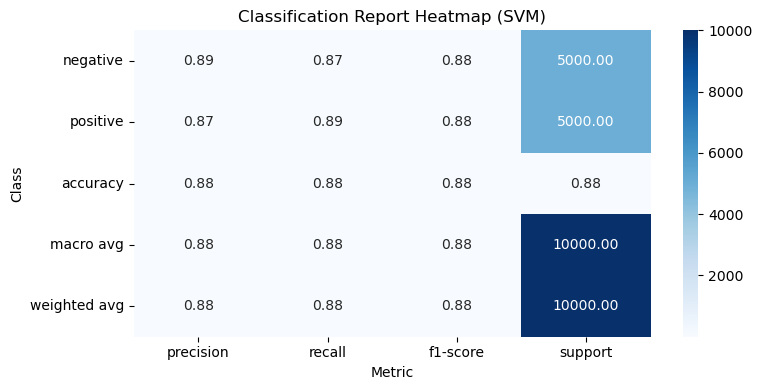

In [51]:
plt.figure(figsize=(8, 4))

sns.heatmap(
    df_report,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Classification Report Heatmap (SVM)")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.7408


In [45]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8519


In [46]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 5, 10]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10]}, scoring='f1')

In [53]:
print("Best parameters:", grid.best_params_)
print("Best CV F1-score:", grid.best_score_)


Best parameters: {'C': 1}
Best CV F1-score: 0.8857903145714012


In [54]:
param_grid = {
    "C": [0.01, 0.1, 1, 5, 10],
    "penalty": ["l2"],
    "solver": ["liblinear", "lbfgs"]
}


In [55]:
lr = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    lr,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [56]:
grid.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=1)

In [57]:
print("Best parameters:", grid.best_params_)
print("Best CV F1-score:", grid.best_score_)


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1-score: 0.8862941274369488


In [58]:
from sklearn.ensemble import BaggingClassifier


In [59]:
base_lr = LogisticRegression(
    C=1,
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)


In [60]:
bagging_lr = BaggingClassifier(
    estimator=base_lr,
    n_estimators=10,        # number of models
    max_samples=0.8,        # 80% of data per model
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)


In [61]:
bagging_lr.fit(X_train, y_train)


BaggingClassifier(estimator=LogisticRegression(C=1, max_iter=1000,
                                               solver='liblinear'),
                  max_samples=0.8, n_jobs=-1, random_state=42)

In [62]:
y_pred_bag = bagging_lr.predict(X_test)

print("Bagging Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_bag))

print(classification_report(y_test, y_pred_bag))

Bagging Logistic Regression Accuracy: 0.8873
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [68]:
df=df.drop(columns=['sentiment','clean_review','stopword_removed','stemmed_tokens'])

In [63]:
import pickle
import os


In [69]:
import os

dataset_path = r"D:\machine learning\IMDB sentiment analysis\Dataset"

os.makedirs(dataset_path, exist_ok=True)

df.to_csv(os.path.join(dataset_path, "imdb_cleaned.csv"), index=False)

print("Cleaned dataset saved successfully ")


Cleaned dataset saved successfully ✅


In [71]:
from sklearn.linear_model import LogisticRegression

best_lr = LogisticRegression(
    C=1,
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)

best_lr.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [72]:
import os
import pickle

# Define model directory (use raw string)
model_path = r"D:\machine learning\IMDB sentiment analysis\model"

# Create directory if it doesn't exist
os.makedirs(model_path, exist_ok=True)

# Save Logistic Regression model
with open(os.path.join(model_path, "logistic_regression_model.pkl"), "wb") as f:
    pickle.dump(best_lr, f)

# Save TF-IDF vectorizer
with open(os.path.join(model_path, "tfidf_vectorizer.pkl"), "wb") as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved successfully ")


Model and vectorizer saved successfully ✅
